## Observations and Insights

## Dependencies and starter code

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how='left') 
combined_data.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [12]:
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [8]:
combined_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#mean
tumor_volume_mean= combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_mean.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#median
tumor_volume_median=combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volume_median.head(20)

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#variance
tumor_volume_variance=combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Look at regimen
regimen_count= combined_data['Drug Regimen'].value_counts()
regimen_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [13]:
#how many drug regimens are there?
reg_count=combined_data['Drug Regimen'].unique()
reg_count

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [14]:
mice_count=combined_data['Mouse ID'].nunique()
mice_count

249

In [15]:
#standard deviation
tumor_volume_std=combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_std.head(15)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#SEM
tumor_volume_sem=combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_volume_sem.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [17]:
#combine results into summary statistics table
summary_stat_tumor_volume=pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_median, 'Variance': tumor_volume_variance, 'Standard Deviation': tumor_volume_std, 'SEM': tumor_volume_sem})

summary_stat_tumor_volume.head(15)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mice_on_regimen_data=combined_data.drop_duplicates(subset='Mouse ID', inplace=True)
mice_on_regimen=combined_data.groupby('Drug Regimen').count()['Mouse ID']
mice_on_regimen



Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [19]:
mice_on_regimen_df= pd.DataFrame({'Number of Mice': mice_on_regimen})
mice_on_regimen_df.reset_index(inplace= True)
mice_on_regimen_df

,Drug Regimen,Number of Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,25
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


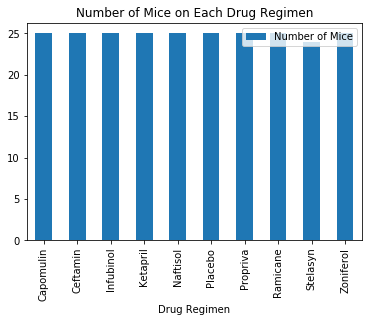

In [20]:
mice_and_regimen_pandas=mice_on_regimen_df[['Drug Regimen', 'Number of Mice']]
mice_and_regimen_pandas=mice_and_regimen_pandas.set_index('Drug Regimen')
mice_and_regimen_pandas.plot(kind='bar')
plt.title("Number of Mice on Each Drug Regimen")
plt.show()

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mice_on_regimen_df.shape

(10, 2)

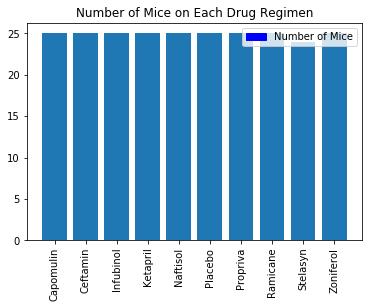

In [125]:
#x_axis=np.arange(mice_on_regimen.shape[0])
#plt.figure(figsize=(20,3))
#plt.bar(x_axis, mice_on_regimen_df['Number of Mice'], color='b', alpha=1, align='center')
#tick_locations=[value for value in x_axis]
#plt.xticks(tick_locations, mice_on_regimen_df['Ceftamin', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'], rotation=vertical)
#plt.show()

objects = ('Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol')
y_pos = np.arange(len(objects))
mice = [25, 25, 25, 25, 25, 25, 25, 25, 24, 25]

plt.bar(y_pos, mice, align='center', alpha=1)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('')
plt.title('Number of Mice on Each Drug Regimen')
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Number of Mice')
plt.legend(handles=[blue_patch])

plt.show()

## Pie plots

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mice_on_regimen=combined_data.groupby('Drug Regimen').count()['Mouse ID']
sex_of_mice_group=combined_data.groupby('Sex').count()['Mouse ID']
sex_of_mice_df= pd.DataFrame({'Number of Mice': sex_of_mice_group})
sex_of_mice_df.reset_index(inplace= True)
sex_of_mice_df

,Sex,Number of Mice
0,Female,124
1,Male,125


Text(0, 0.5, '')

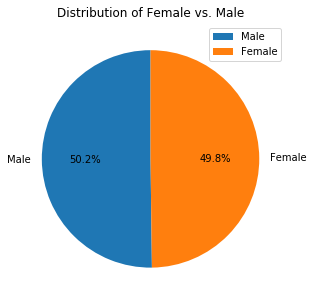

In [75]:
sex_of_mice_df=pd.DataFrame({'Number of Mice': [125, 124],},
                  index=['Male', 'Female'])
plot = sex_of_mice_df.plot.pie(y= 'Number of Mice', figsize=(5, 5), autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male")
plot.set_ylabel('')


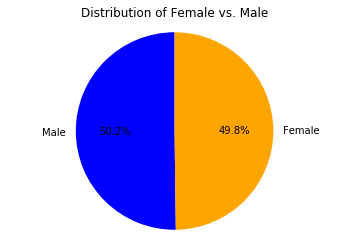

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=["Male", "Female"]
sex_count=["125", "124"]
colors=['blue', 'orange']
plt.title('Distribution of Female vs. Male')
plt.pie(sex_count, labels=sex, colors=colors, autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#ftv_group= combined_data.groupby('Mouse ID').max()

#max_Cap_df = ftv_group.loc[(ftv_group["Drug Regimen"] == "Capomulin"),:]
#max_Cap_df

#ftv_df=pd.merge(combined_data, ftv_group, on=["Mouse ID", "Timepoint"], how='left')
#ftv_df.head(10)

# First create a subset of the combined_data dataframe where 'Drug Regimen' is
#in [Capomulin, Ramicane, Infubinol, and Ceftamin]
# Create a list of the four drugs to examine
#four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Slice the original combined_data dataframe using the list of four drugs
#four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]
# View the newly created subset dataframe
#four_drugs.head()
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
#four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\Last_tumor_size=('Tumor Volume (mm3)',lambda x:x.iloc[-1])).round(3)
# Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
#Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1]).round(3)
# View the groupby dataframe
#four_last_tumor

four_drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs=combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]
four_last_tumor=four_drugs.groupby(['Drug Regimen', 'Mouse ID']).agg(\Last_tumor_size=('Tumor Volume (mm3)', lambda x:x.iloc[-1])).round(3)
four_last_tumor


#drugR_df = ftv_df.loc[(ftv_df["Drug Regimen_x"] == "Ramicane") & (ftv_df["Timepoint"]),:]
#drugR_df.head()

#quartiles = temperatures.quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

SyntaxError: unexpected character after line continuation character (<ipython-input-76-0ba1b70cedf2>, line 27)

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

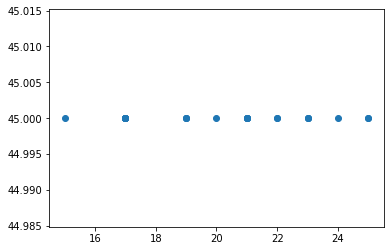

In [79]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
mouse_weight=capomulin_df.groupby('Mouse ID').mean()
mouse_weight

plt.scatter(mouse_weight['Weight (g)'], mouse_weight['Tumor Volume (mm3)'])
plt.show()
#ADD X Y LABELS, EVERYTHING ELSE

In [78]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight['Weight (g)']
y_values = mouse_weight['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values,y_values)
print(correlation) #PRINT 'THIS IS.....MAKE NICE'

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

#CHANGE X Y LABELS




C:\Users\kyran\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


(nan, nan)


ValueError: Image size of 607x250856 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>